In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gensim
import seaborn as sb

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
totalData = pd.read_csv('https://raw.githubusercontent.com/indicium15/sc1015-project/main/totalData.csv')
totalData.drop(['Unnamed: 0'], inplace=True, axis=1)
totalData.head()
totalData.shape

(44898, 2)

In [ ]:
#removing the null values
totalData = totalData[totalData['title'].notnull()]


In [ ]:

# totalData.head()
y = totalData['class'].values
x = [d.split() for d in totalData['title'].tolist()]
print(len(x))

# print(x.)
# print(y)

44891


In [ ]:
## converting the words to vectors
wordToVec = gensim.models.Word2Vec(sentences=x, size=100, window=10, min_count=1)
len(wordToVec.wv.vocab)

26133

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)
x = tokenizer.texts_to_sequences(x)

(array([1.600e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.600e+01,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.900e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 8.400e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.810e+02, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

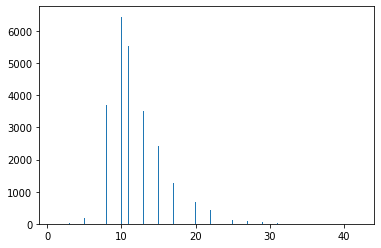

In [ ]:
plt.hist([len(y) for y in x], bins=700)

In [ ]:
array = np.array([len(y) for y in x])
maximumLength = 1000
x = pad_sequences(x, maxlen=maximumLength)

In [ ]:
sizeOfVocab = len(tokenizer.word_index) + 1
totalVocab = tokenizer.word_index


In [ ]:
def calculateMatrixWeight(model):
    matrixWeight = np.zeros((sizeOfVocab, 100))
    for word, index in totalVocab.items():
        matrixWeight[index]=model.wv[word]
    return matrixWeight

In [ ]:
vectorsToEmbed = calculateMatrixWeight(wordToVec)
vectorsToEmbed.shape

(26134, 100)

In [ ]:
totalModel = Sequential()
totalModel.add(Embedding(sizeOfVocab, output_dim=100, weights=[vectorsToEmbed], input_length=maximumLength, trainable=False))
totalModel.add(LSTM(units=128))
totalModel.add(Dense(1, activation='sigmoid'))
totalModel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y)
totalModel.fit(x_train,y_train, validation_split=0.65, epochs=9)
# print(y.shape)
# print(x.shape)

Epoch 1/9
369/369 [==============================] - 94s 235ms/step - loss: 0.2941 - acc: 0.8739 - val_loss: 0.2426 - val_acc: 0.9027
Epoch 2/9
369/369 [==============================] - 94s 255ms/step - loss: 0.2472 - acc: 0.8970 - val_loss: 0.2568 - val_acc: 0.8934
Epoch 3/9
369/369 [==============================] - 84s 229ms/step - loss: 0.3512 - acc: 0.8479 - val_loss: 0.2933 - val_acc: 0.8782
Epoch 4/9
369/369 [==============================] - 84s 227ms/step - loss: 0.2951 - acc: 0.8749 - val_loss: 0.2557 - val_acc: 0.8975
Epoch 5/9
369/369 [==============================] - 84s 227ms/step - loss: 0.2642 - acc: 0.8908 - val_loss: 0.2506 - val_acc: 0.9002
Epoch 6/9
369/369 [==============================] - 84s 228ms/step - loss: 0.2586 - acc: 0.8942 - val_loss: 0.2519 - val_acc: 0.8980
Epoch 7/9
369/369 [==============================] - 93s 253ms/step - loss: 0.2333 - acc: 0.9036 - val_loss: 0.2386 - val_acc: 0.9052
Epoch 8/9
369/369 [==============================] - 84s 228ms

In [ ]:
y_pred_train = (totalModel.predict(x_train) >= 0.5).astype(int)
y_pred_test = (totalModel.predict(x_test) >= 0.5).astype(int)
print('The accuracy for test: {}'.format(accuracy_score(y_test, y_pred_test)))

The accuracy for test: 0.9110754700169296


[Text(0.5, 51.0, 'Test Data')]

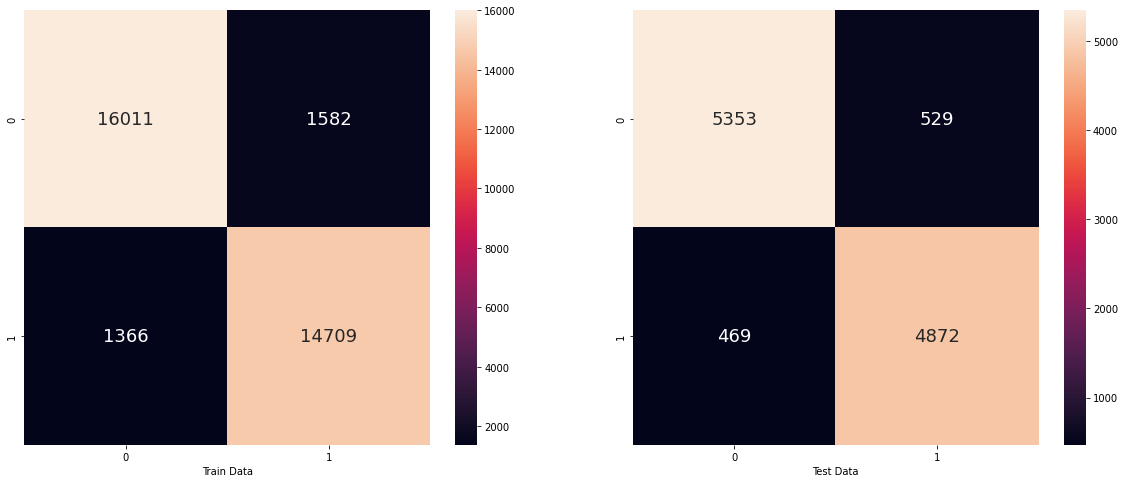

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(20, 8))

from sklearn.metrics import confusion_matrix
train = sb.heatmap(confusion_matrix(y_train, y_pred_train), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
train.set( xlabel = "Train Data")


test = sb.heatmap(confusion_matrix(y_test, y_pred_test), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])
test.set(xlabel="Test Data")

In [ ]:
x = ['hello there how are you']
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=maximumLength)
(totalModel.predict(x)>=0.5).astype(int)

array([[0]])